In [ ]:
# Core libraries
!pip install pandas numpy scikit-learn matplotlib seaborn

# ML frameworks
!pip install xgboost lightgbm catboost tensorflow

# Optimization and resampling
!pip install optuna imbalanced-learn

In [3]:
%matplotlib inline

In [4]:
import os
import pandas as pd

# Path to the CSV file
file_path = "/workspace/5G_network_slicing_qos_dataset.csv"

# Try to load and inspect the file
try:
    df = pd.read_csv(file_path, nrows=5)  # Read only first 5 rows for quick inspection
    print(f"File: {file_path}")
    print(f"Rows: {len(df)}, Columns: {list(df.columns)}")
    print(df.head())
except Exception as e:
    print(f"Error reading file: {file_path}\nException: {e}")

File: /workspace/5G_network_slicing_qos_dataset.csv
Rows: 5, Columns: ['Network Slice ID', 'Timestamp', 'Device ID', 'Traffic Load (bps)', 'Traffic Type', 'Network Utilization (%)', 'Latency (ms)', 'Packet Loss Rate (%)', 'Signal Strength (dBm)', 'Bandwidth Utilization (%)', 'Network Slice Failure', 'QoS Metric (Throughput)', 'Overload Status', 'Device Type', 'Region', 'Network Failure Count', 'Time of Day', 'Weather Conditions']
   Network Slice ID            Timestamp  Device ID  Traffic Load (bps)  \
0                 3  2025-01-01 00:00:00        194            0.683597   
1                 4  2025-01-01 01:00:00        197            0.134882   
2                 1  2025-01-01 02:00:00        159            0.343440   
3                 3  2025-01-01 03:00:00        163            0.171060   
4                 3  2025-01-01 04:00:00        187            0.943730   

   Traffic Type  Network Utilization (%)  Latency (ms)  Packet Loss Rate (%)  \
0             3                 0.8

In [5]:
import pandas as pd

# Correct path to the dataset
file_path = "/workspace/5G_network_slicing_qos_dataset.csv"

# Load the CSV file
df = pd.read_csv(file_path)

# Show basic info about the dataset
print("Dataset loaded successfully.")
print(f"Shape: {df.shape}")

# List all column names
print("\nColumn names:")
print(df.columns.tolist())

# Display the first 5 rows of the dataset
print("\nSample data:")
print(df.head())

# Check for missing values in each column
print("\nMissing values per column:")
print(df.isna().sum())

Dataset loaded successfully.
Shape: (2345, 18)

Column names:
['Network Slice ID', 'Timestamp', 'Device ID', 'Traffic Load (bps)', 'Traffic Type', 'Network Utilization (%)', 'Latency (ms)', 'Packet Loss Rate (%)', 'Signal Strength (dBm)', 'Bandwidth Utilization (%)', 'Network Slice Failure', 'QoS Metric (Throughput)', 'Overload Status', 'Device Type', 'Region', 'Network Failure Count', 'Time of Day', 'Weather Conditions']

Sample data:
   Network Slice ID            Timestamp  Device ID  Traffic Load (bps)  \
0                 3  2025-01-01 00:00:00        194            0.683597   
1                 4  2025-01-01 01:00:00        197            0.134882   
2                 1  2025-01-01 02:00:00        159            0.343440   
3                 3  2025-01-01 03:00:00        163            0.171060   
4                 3  2025-01-01 04:00:00        187            0.943730   

   Traffic Type  Network Utilization (%)  Latency (ms)  Packet Loss Rate (%)  \
0             3              

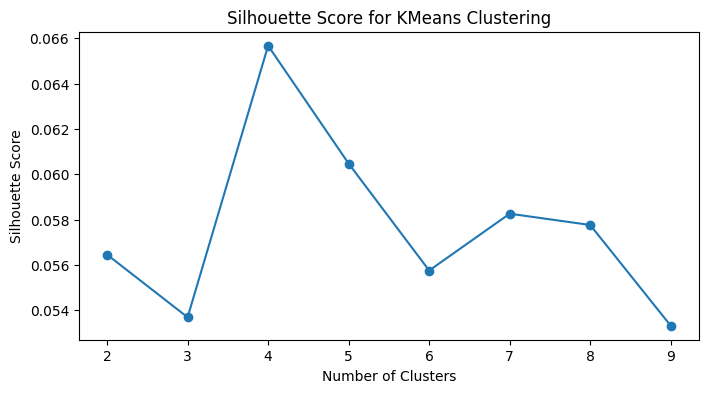

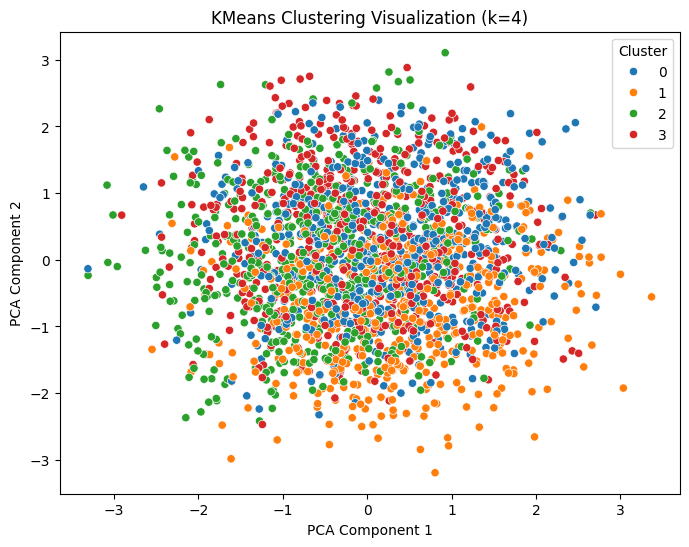

In [6]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/workspace/5G_network_slicing_qos_dataset.csv")

# Drop non-behavioral or identifier columns
df_cluster = df.drop(columns=[
    'Timestamp', 'Device ID', 'QoS Metric (Throughput)', 'Network Slice ID'
])

# One-hot encode categorical features
categorical_cols = df_cluster.select_dtypes(include='object').columns.tolist()
df_cluster_encoded = pd.get_dummies(df_cluster, columns=categorical_cols)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster_encoded)

# Determine optimal number of clusters using silhouette score
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for KMeans Clustering")
plt.show()

# Fit KMeans with optimal k (for example, k=3 based on score)
optimal_k = np.argmax(silhouette_scores) + 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = cluster_labels

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='tab10')
plt.title(f"KMeans Clustering Visualization (k={optimal_k})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Load dataset
df = pd.read_csv("/workspace/5G_network_slicing_qos_dataset.csv")

# Drop unused columns for clustering
df_cluster = df.drop(columns=[
    'Timestamp', 'Device ID', 'QoS Metric (Throughput)', 'Network Slice ID'
])

# Encode categorical features
categorical_cols = df_cluster.select_dtypes(include='object').columns.tolist()
df_cluster_encoded = pd.get_dummies(df_cluster, columns=categorical_cols)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster_encoded)

# Find optimal number of clusters
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Select best number of clusters
optimal_k = np.argmax(silhouette_scores) + 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Confirm
print("Cluster column added. Shape:", df.shape)
print("Clusters:", df["Cluster"].unique())

Cluster column added. Shape: (2345, 19)
Clusters: [0 1 2 3]


In [11]:
print("Unique values in 'Time of Day':", df["Time of Day"].unique())
assert df["Time of Day"].between(0, 23).all(), "Column 'Time of Day' contains invalid values."

Unique values in 'Time of Day': [1 2 0]


In [12]:
window_size = 5  # your time steps

# Count rows per Region
group_counts = df.groupby("Region").size()

# Покажем группы, у которых данных меньше, чем нужно
insufficient_groups = group_counts[group_counts < (window_size + 1)]
print("Groups with insufficient length:\n", insufficient_groups)

# Фильтруем датасет, оставляя только подходящие группы
valid_regions = group_counts[group_counts >= (window_size + 1)].index
df = df[df["Region"].isin(valid_regions)]

print(f"Filtered DataFrame shape: {df.shape}")

Groups with insufficient length:
 Series([], dtype: int64)
Filtered DataFrame shape: (2345, 20)


In [13]:
df = pd.read_csv("/workspace/5G_network_slicing_qos_dataset.csv")
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df["Time of Day"] = df["Timestamp"].dt.hour

# Then create cyclical encoding
df["Hour_sin"] = np.sin(2 * np.pi * df["Time of Day"] / 24)
df["Hour_cos"] = np.cos(2 * np.pi * df["Time of Day"] / 24)

In [14]:
df["Time of Day"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int32)

In [15]:
import numpy as np

df["Hour_sin"] = np.sin(2 * np.pi * df["Time of Day"] / 24)
df["Hour_cos"] = np.cos(2 * np.pi * df["Time of Day"] / 24)

In [31]:
!pip install xgboost
!pip install catboost
!pip install lightgbm


[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip


In [32]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip


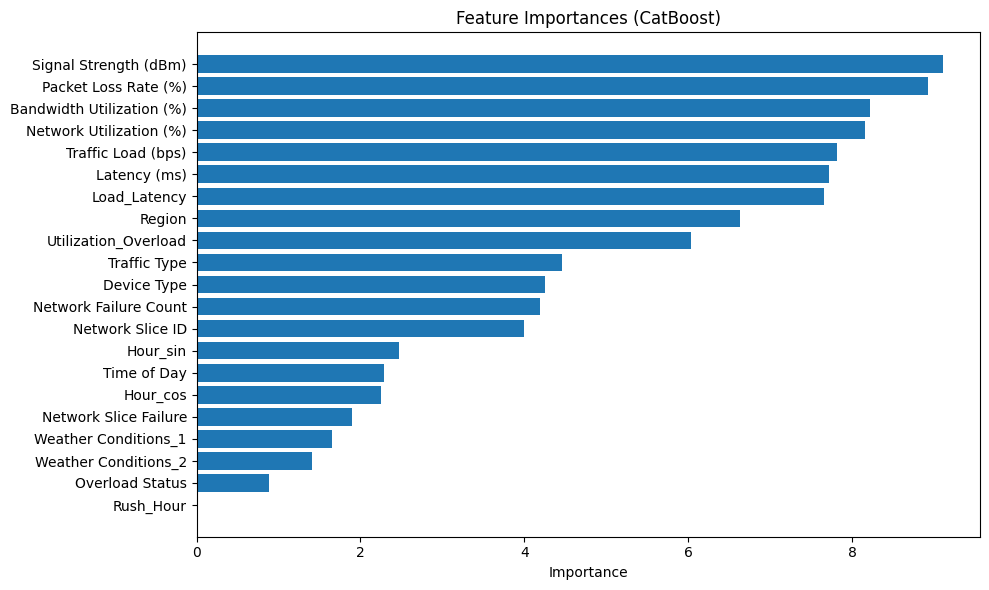

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier, Pool

# === Load dataset ===
df = pd.read_csv("/workspace/5G_network_slicing_qos_dataset.csv")

# === Feature engineering ===
df["Rush_Hour"] = df["Time of Day"].apply(lambda x: 1 if x in [7, 8, 9, 17, 18, 19] else 0)
df["Load_Latency"] = df["Traffic Load (bps)"] * df["Latency (ms)"]
df["Utilization_Overload"] = df["Network Utilization (%)"] * df["Overload Status"]
df["Hour_sin"] = np.sin(2 * np.pi * df["Time of Day"] / 24)
df["Hour_cos"] = np.cos(2 * np.pi * df["Time of Day"] / 24)

# === Binary target ===
df["QoS_Binary"] = (df["QoS Metric (Throughput)"] > 0.7).astype(int)
df.drop(columns=["Timestamp", "Device ID", "QoS Metric (Throughput)"], inplace=True)
df = pd.get_dummies(df, columns=["Weather Conditions"], drop_first=True)

# === Features and target ===
X = df.drop(columns=["QoS_Binary"])
y = df["QoS_Binary"]

# === Train CatBoost ===
model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X, y)

# === Plot feature importance ===
feature_importance = model.get_feature_importance(Pool(X, label=y))
feature_names = X.columns

# Plot
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Importance")
plt.title("Feature Importances (CatBoost)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [44]:
!pip install optuna imbalanced-learn


[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip


In [47]:
!pip install catboost optuna imbalanced-learn


[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip



Model evaluation: RandomForest

Fold 1
Threshold: 0.50
Confusion Matrix:
 [[265  60]
 [ 88 237]]
Accuracy: 0.7723 | F1: 0.7621 | AUC: 0.8362


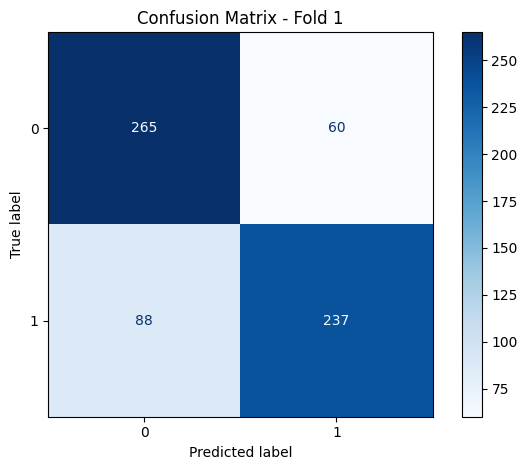


Fold 2
Threshold: 0.51
Confusion Matrix:
 [[269  56]
 [102 223]]
Accuracy: 0.7569 | F1: 0.7384 | AUC: 0.8186


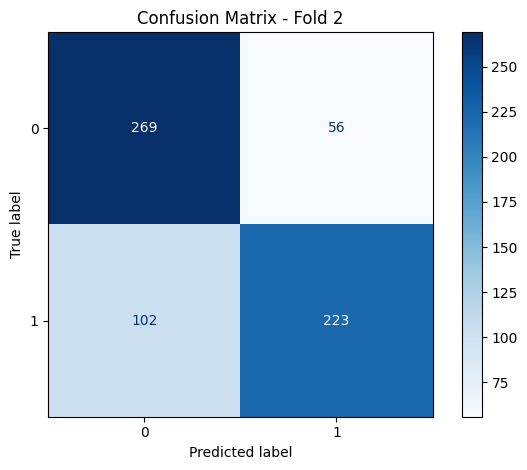


Fold 3
Threshold: 0.53
Confusion Matrix:
 [[277  48]
 [ 87 238]]
Accuracy: 0.7923 | F1: 0.7791 | AUC: 0.8617


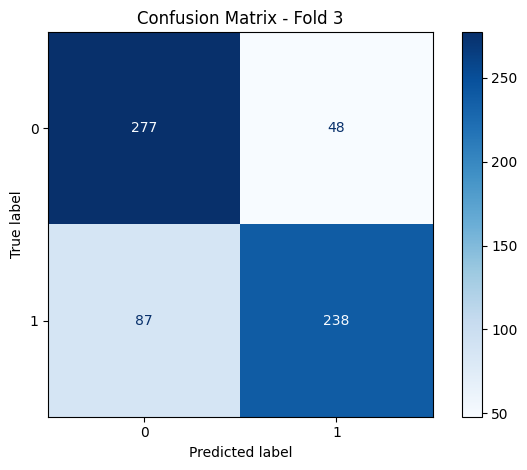


Fold 4
Threshold: 0.52
Confusion Matrix:
 [[273  52]
 [ 72 252]]
Accuracy: 0.8089 | F1: 0.8025 | AUC: 0.8737


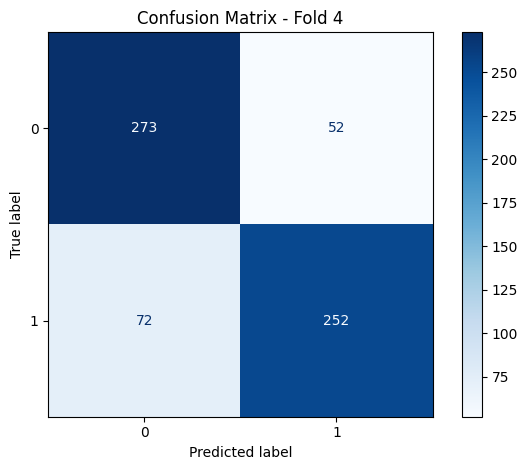


Fold 5
Threshold: 0.53
Confusion Matrix:
 [[284  40]
 [ 87 238]]
Accuracy: 0.8043 | F1: 0.7894 | AUC: 0.8627


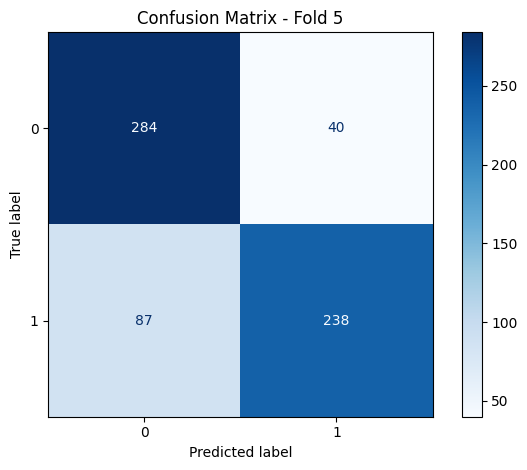

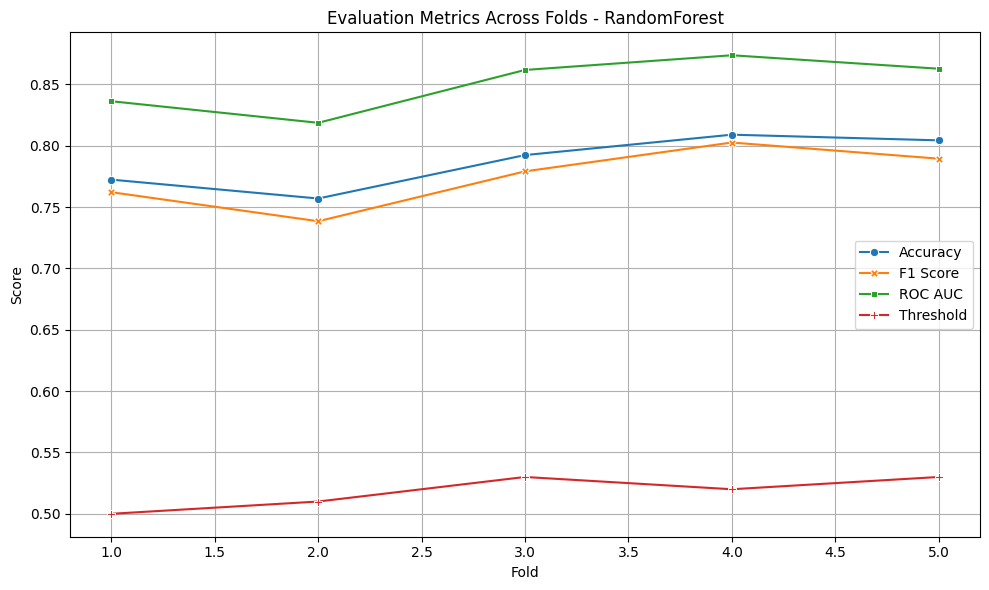


Average metrics:
Accuracy: 0.7869579234324997
F1-score: 0.7742906764729753
ROC AUC: 0.8505643772371977
Threshold: 0.5180000000000002


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

def evaluate_model_rf(model, X_selected, y_resampled):
    print("\nModel evaluation: RandomForest")
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracies, f1s, aucs, thresholds = [], [], [], []

    for fold, (train_idx, test_idx) in enumerate(skf.split(X_selected, y_resampled), 1):
        X_train, X_test = X_selected[train_idx], X_selected[test_idx]
        y_train, y_test = y_resampled[train_idx], y_resampled[test_idx]

        model.fit(X_train, y_train)
        y_proba = model.predict_proba(X_test)[:, 1]

        best_f1, best_t = 0, 0.5
        for t in np.arange(0.3, 0.71, 0.01):
            preds = (y_proba >= t).astype(int)
            score = f1_score(y_test, preds)
            if score > best_f1:
                best_f1 = score
                best_t = t

        y_pred = (y_proba >= best_t).astype(int)
        cm = confusion_matrix(y_test, y_pred)

        print(f"\nFold {fold}")
        print(f"Threshold: {best_t:.2f}")
        print("Confusion Matrix:\n", cm)
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f} | F1: {f1_score(y_test, y_pred):.4f} | AUC: {roc_auc_score(y_test, y_proba):.4f}")

        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap="Blues")
        plt.title(f"Confusion Matrix - Fold {fold}")
        plt.tight_layout()
        plt.show()

        accuracies.append(accuracy_score(y_test, y_pred))
        f1s.append(f1_score(y_test, y_pred))
        aucs.append(roc_auc_score(y_test, y_proba))
        thresholds.append(best_t)

    metrics = pd.DataFrame({
        "Fold": np.arange(1, 6),
        "Accuracy": accuracies,
        "F1 Score": f1s,
        "ROC AUC": aucs,
        "Threshold": thresholds
    })

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=metrics.set_index("Fold"), markers=True, dashes=False)
    plt.title("Evaluation Metrics Across Folds - RandomForest")
    plt.ylabel("Score")
    plt.xlabel("Fold")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print("\nAverage metrics:")
    print("Accuracy:", np.mean(accuracies))
    print("F1-score:", np.mean(f1s))
    print("ROC AUC:", np.mean(aucs))
    print("Threshold:", np.mean(thresholds))

# Call it
evaluate_model_rf(rf_model, X_selected_rf, y_resampled)


Model evaluation: LightGBM

Fold 1
Threshold: 0.36
Confusion Matrix:
 [[235  90]
 [ 64 261]]
Accuracy: 0.7631 | F1: 0.7722 | AUC: 0.8307


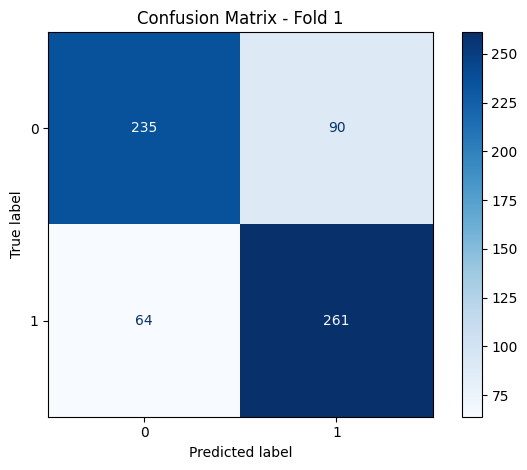


Fold 2
Threshold: 0.44
Confusion Matrix:
 [[234  91]
 [ 56 269]]
Accuracy: 0.7738 | F1: 0.7854 | AUC: 0.8526


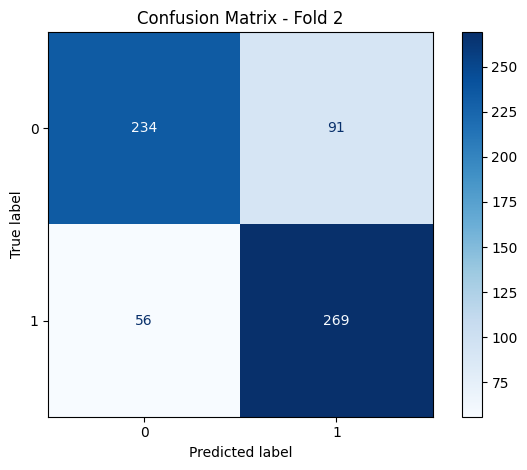


Fold 3
Threshold: 0.55
Confusion Matrix:
 [[261  64]
 [ 70 255]]
Accuracy: 0.7938 | F1: 0.7919 | AUC: 0.8713


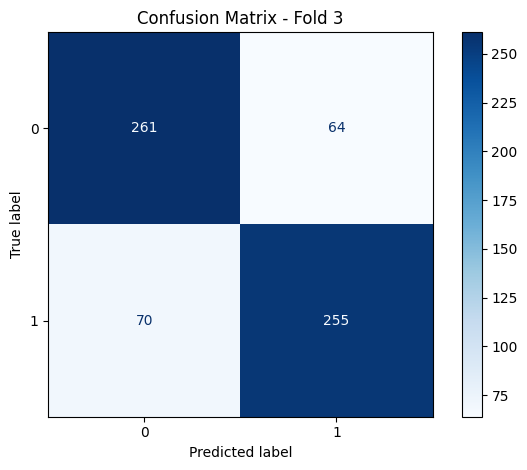


Fold 4
Threshold: 0.55
Confusion Matrix:
 [[265  60]
 [ 63 261]]
Accuracy: 0.8105 | F1: 0.8093 | AUC: 0.8686


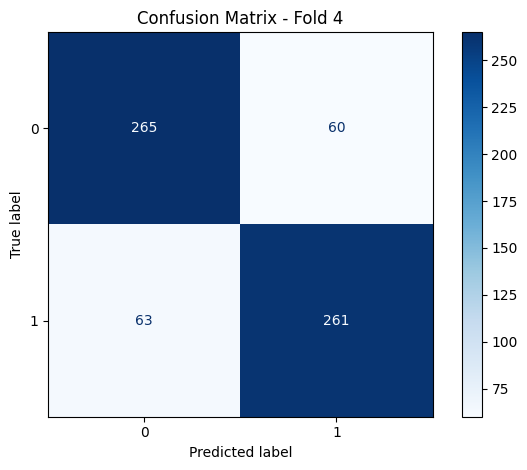


Fold 5
Threshold: 0.67
Confusion Matrix:
 [[277  47]
 [ 77 248]]
Accuracy: 0.8089 | F1: 0.8000 | AUC: 0.8729


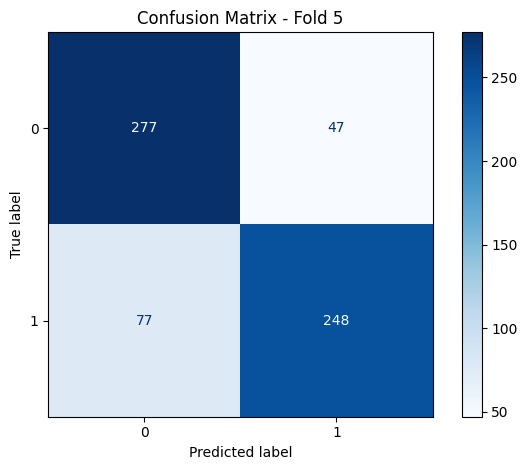

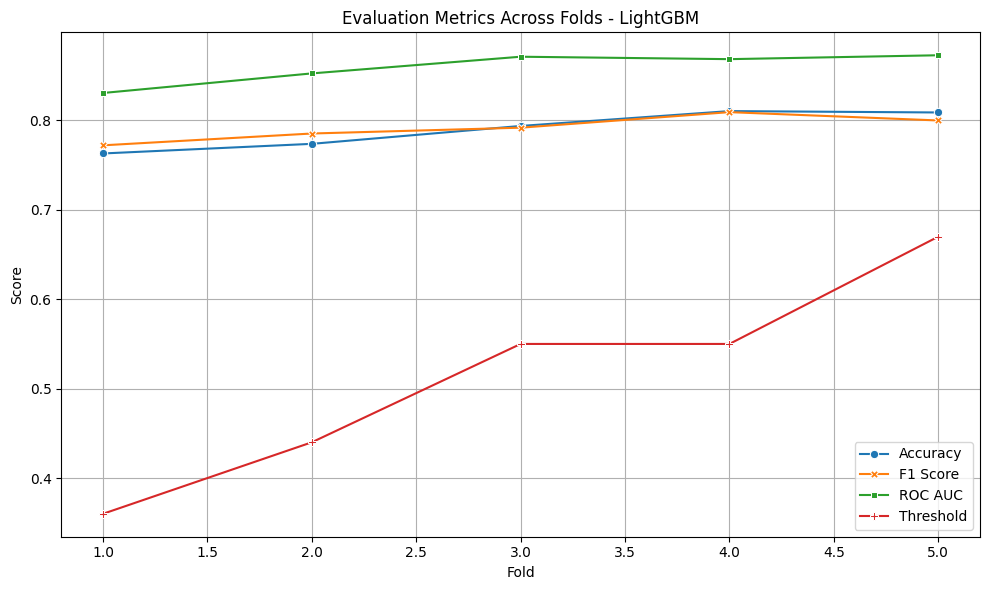


Average metrics:
Accuracy: 0.7900367429180989
F1-score: 0.791763720077269
ROC AUC: 0.8592378522901601
Threshold: 0.5140000000000002


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

def evaluate_model_lgb(model, X_selected, y_resampled):
    print("\nModel evaluation: LightGBM")
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracies, f1s, aucs, thresholds = [], [], [], []

    for fold, (train_idx, test_idx) in enumerate(skf.split(X_selected, y_resampled), 1):
        X_train, X_test = X_selected[train_idx], X_selected[test_idx]
        y_train, y_test = y_resampled[train_idx], y_resampled[test_idx]

        model.fit(X_train, y_train)
        y_proba = model.predict_proba(X_test)[:, 1]

        best_f1, best_t = 0, 0.5
        for t in np.arange(0.3, 0.71, 0.01):
            preds = (y_proba >= t).astype(int)
            score = f1_score(y_test, preds)
            if score > best_f1:
                best_f1 = score
                best_t = t

        y_pred = (y_proba >= best_t).astype(int)
        cm = confusion_matrix(y_test, y_pred)

        print(f"\nFold {fold}")
        print(f"Threshold: {best_t:.2f}")
        print("Confusion Matrix:\n", cm)
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f} | F1: {f1_score(y_test, y_pred):.4f} | AUC: {roc_auc_score(y_test, y_proba):.4f}")

        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap="Blues")
        plt.title(f"Confusion Matrix - Fold {fold}")
        plt.tight_layout()
        plt.show()

        accuracies.append(accuracy_score(y_test, y_pred))
        f1s.append(f1_score(y_test, y_pred))
        aucs.append(roc_auc_score(y_test, y_proba))
        thresholds.append(best_t)

    metrics = pd.DataFrame({
        "Fold": np.arange(1, 6),
        "Accuracy": accuracies,
        "F1 Score": f1s,
        "ROC AUC": aucs,
        "Threshold": thresholds
    })

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=metrics.set_index("Fold"), markers=True, dashes=False)
    plt.title("Evaluation Metrics Across Folds - LightGBM")
    plt.ylabel("Score")
    plt.xlabel("Fold")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print("\nAverage metrics:")
    print("Accuracy:", np.mean(accuracies))
    print("F1-score:", np.mean(f1s))
    print("ROC AUC:", np.mean(aucs))
    print("Threshold:", np.mean(thresholds))

# Call it
evaluate_model_lgb(lgb_model, X_selected_lgb, y_resampled)


Model evaluation: XGBoost

Fold 1
Threshold: 0.56
Confusion Matrix:
 [[244  81]
 [ 79 246]]
Accuracy: 0.7538 | F1: 0.7546 | AUC: 0.8185


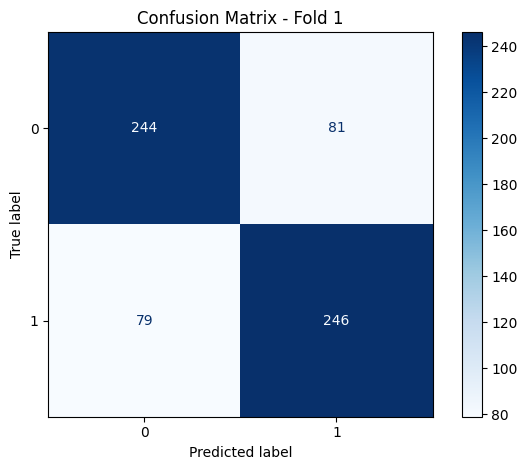


Fold 2
Threshold: 0.59
Confusion Matrix:
 [[251  74]
 [ 74 251]]
Accuracy: 0.7723 | F1: 0.7723 | AUC: 0.8360


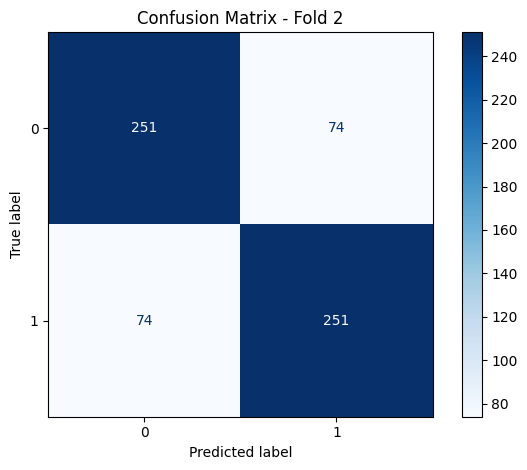


Fold 3
Threshold: 0.59
Confusion Matrix:
 [[257  68]
 [ 69 256]]
Accuracy: 0.7892 | F1: 0.7889 | AUC: 0.8695


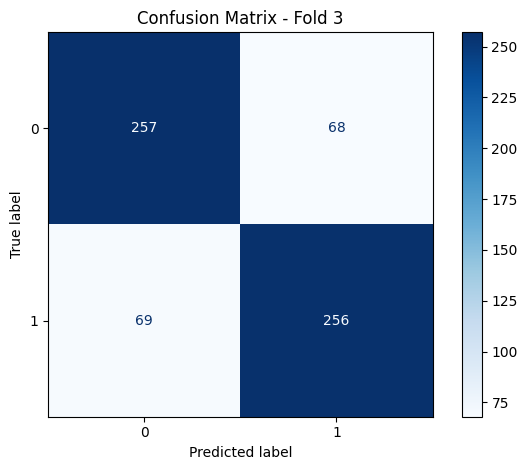


Fold 4
Threshold: 0.64
Confusion Matrix:
 [[281  44]
 [ 72 252]]
Accuracy: 0.8213 | F1: 0.8129 | AUC: 0.8763


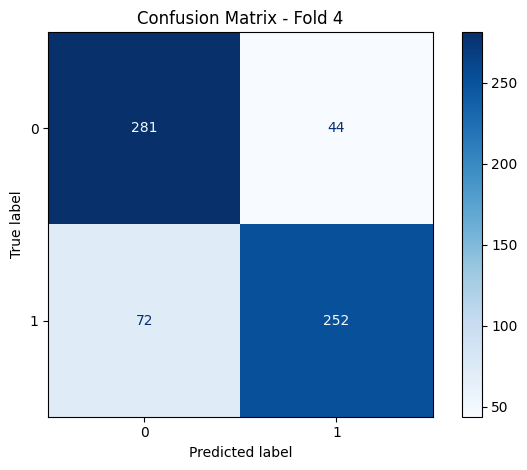


Fold 5
Threshold: 0.57
Confusion Matrix:
 [[248  76]
 [ 63 262]]
Accuracy: 0.7858 | F1: 0.7903 | AUC: 0.8673


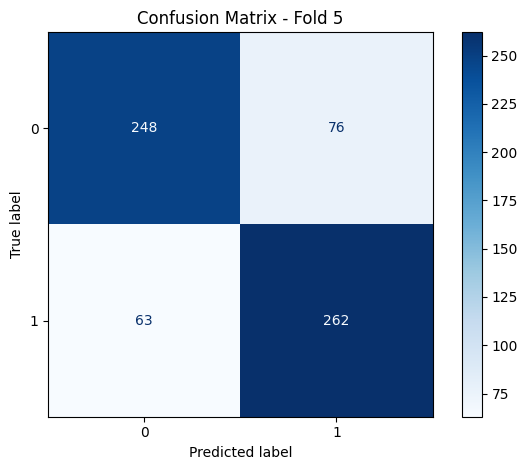

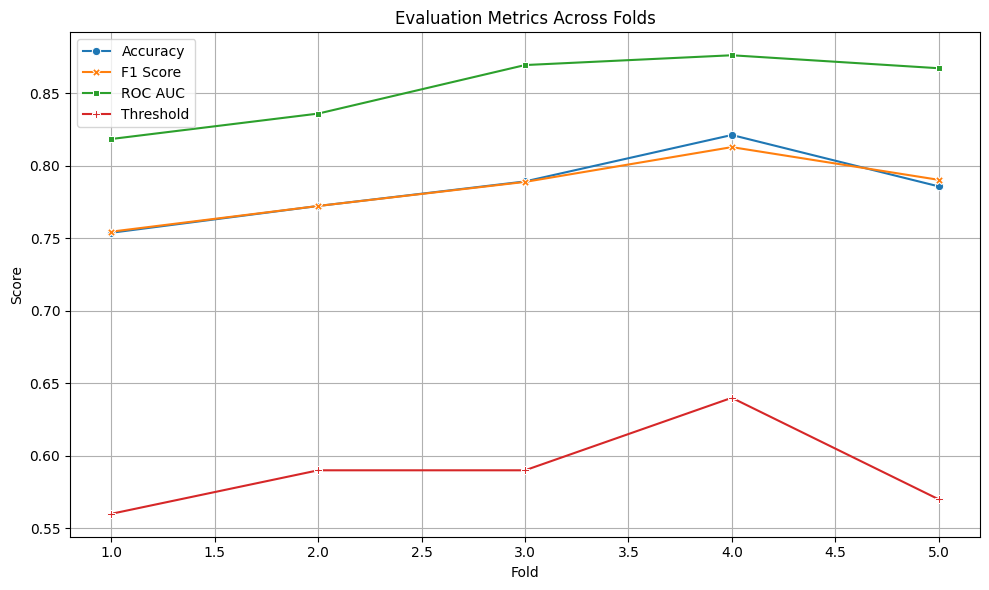


Average metrics:
Accuracy: 0.7844944885622851
F1-score: 0.7838130124693936
ROC AUC: 0.8535226707575425
Threshold: 0.5900000000000003


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

def evaluate_model_xgb(model, X_selected, y_resampled):
    print("\nModel evaluation: XGBoost")
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracies, f1s, aucs, thresholds = [], [], [], []

    for fold, (train_idx, test_idx) in enumerate(skf.split(X_selected, y_resampled), 1):
        X_train, X_test = X_selected[train_idx], X_selected[test_idx]
        y_train, y_test = y_resampled[train_idx], y_resampled[test_idx]

        model.fit(X_train, y_train)
        y_proba = model.predict_proba(X_test)[:, 1]

        best_f1, best_t = 0, 0.5
        for t in np.arange(0.3, 0.71, 0.01):
            preds = (y_proba >= t).astype(int)
            score = f1_score(y_test, preds)
            if score > best_f1:
                best_f1 = score
                best_t = t

        y_pred = (y_proba >= best_t).astype(int)
        cm = confusion_matrix(y_test, y_pred)

        print(f"\nFold {fold}")
        print(f"Threshold: {best_t:.2f}")
        print("Confusion Matrix:\n", cm)
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f} | F1: {f1_score(y_test, y_pred):.4f} | AUC: {roc_auc_score(y_test, y_proba):.4f}")

        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap="Blues")
        plt.title(f"Confusion Matrix - Fold {fold}")
        plt.tight_layout()
        plt.show()

        accuracies.append(accuracy_score(y_test, y_pred))
        f1s.append(f1_score(y_test, y_pred))
        aucs.append(roc_auc_score(y_test, y_proba))
        thresholds.append(best_t)

    metrics = pd.DataFrame({
        "Fold": np.arange(1, 6),
        "Accuracy": accuracies,
        "F1 Score": f1s,
        "ROC AUC": aucs,
        "Threshold": thresholds
    })

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=metrics.set_index("Fold"), markers=True, dashes=False)
    plt.title("Evaluation Metrics Across Folds")
    plt.ylabel("Score")
    plt.xlabel("Fold")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print("\nAverage metrics:")
    print("Accuracy:", np.mean(accuracies))
    print("F1-score:", np.mean(f1s))
    print("ROC AUC:", np.mean(aucs))
    print("Threshold:", np.mean(thresholds))

# Call the function
evaluate_model_xgb(xgb_model, X_selected_xgb, y_resampled)


Model evaluation: CatBoost

Fold 1
Threshold: 0.56
Confusion Matrix:
 [[275  50]
 [ 83 242]]
Accuracy: 0.7954 | F1: 0.7844 | AUC: 0.8459


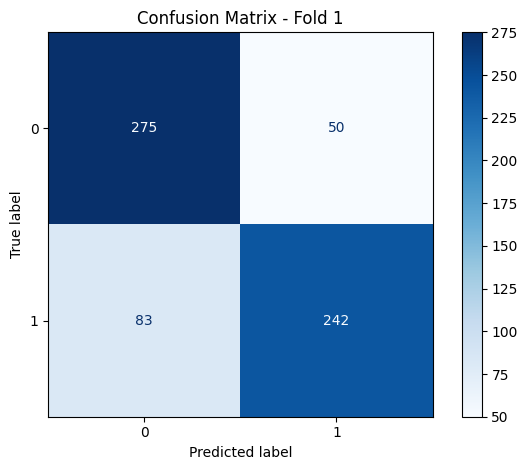


Fold 2
Threshold: 0.64
Confusion Matrix:
 [[297  28]
 [ 83 242]]
Accuracy: 0.8292 | F1: 0.8134 | AUC: 0.8702


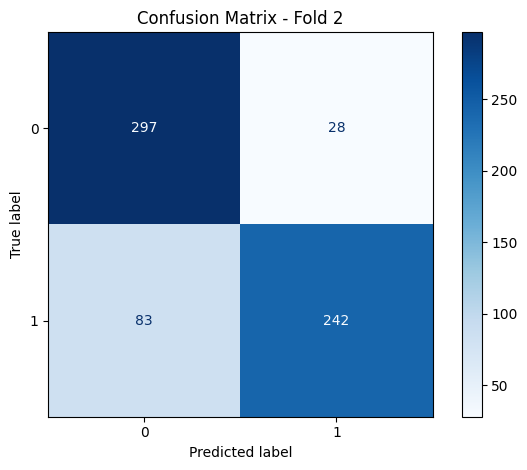


Fold 3
Threshold: 0.56
Confusion Matrix:
 [[279  46]
 [ 66 259]]
Accuracy: 0.8277 | F1: 0.8222 | AUC: 0.8876


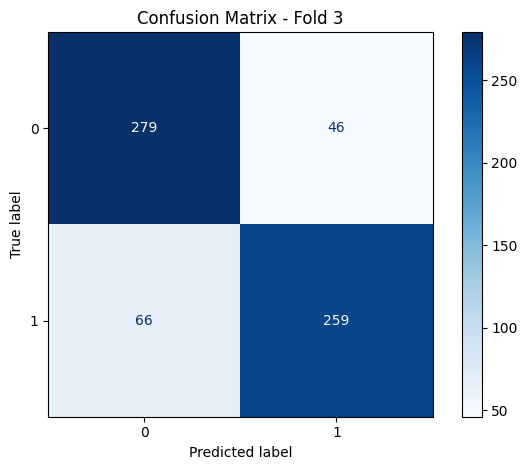


Fold 4
Threshold: 0.57
Confusion Matrix:
 [[293  32]
 [ 62 262]]
Accuracy: 0.8552 | F1: 0.8479 | AUC: 0.8992


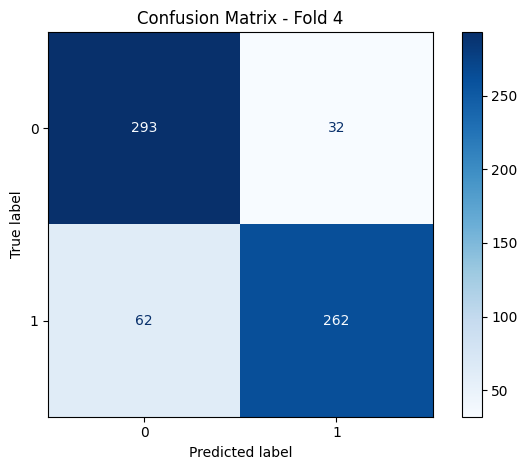


Fold 5
Threshold: 0.56
Confusion Matrix:
 [[272  52]
 [ 62 263]]
Accuracy: 0.8243 | F1: 0.8219 | AUC: 0.8984


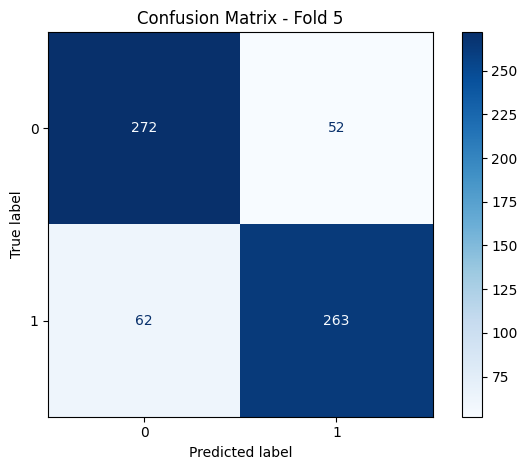

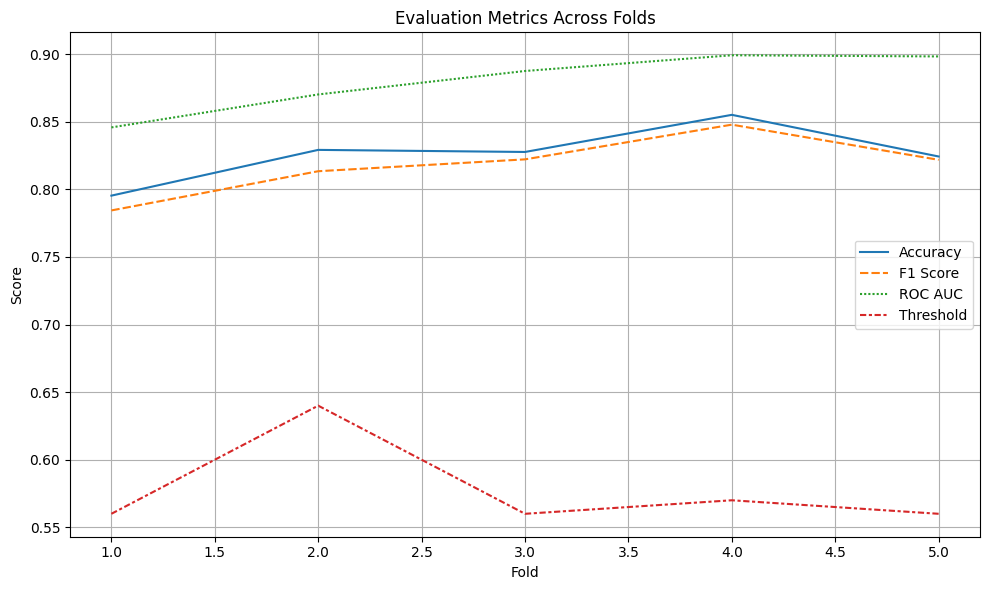


Average metrics:
Accuracy: 0.8263629252103829
F1-score: 0.8179759766581229
ROC AUC: 0.8802655153773102
Threshold: 0.5780000000000003


In [66]:
from catboost import CatBoostClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def evaluate_model_cb(model, X_selected):
    print("\nModel evaluation: CatBoost")
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracies, f1s, aucs, thresholds = [], [], [], []

    for fold, (train_idx, test_idx) in enumerate(skf.split(X_selected, y_resampled), 1):
        X_train, X_test = X_selected[train_idx], X_selected[test_idx]
        y_train, y_test = y_resampled[train_idx], y_resampled[test_idx]

        model.fit(X_train, y_train)
        y_proba = model.predict_proba(X_test)[:, 1]

        best_f1, best_t = 0, 0.5
        for t in np.arange(0.3, 0.71, 0.01):
            preds = (y_proba >= t).astype(int)
            score = f1_score(y_test, preds)
            if score > best_f1:
                best_f1 = score
                best_t = t

        y_pred = (y_proba >= best_t).astype(int)
        cm = confusion_matrix(y_test, y_pred)

        print(f"\nFold {fold}")
        print(f"Threshold: {best_t:.2f}")
        print("Confusion Matrix:\n", cm)
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f} | F1: {f1_score(y_test, y_pred):.4f} | AUC: {roc_auc_score(y_test, y_proba):.4f}")

        ConfusionMatrixDisplay(cm).plot(cmap="Blues")
        plt.title(f"Confusion Matrix - Fold {fold}")
        plt.tight_layout()
        plt.show()

        accuracies.append(accuracy_score(y_test, y_pred))
        f1s.append(f1_score(y_test, y_pred))
        aucs.append(roc_auc_score(y_test, y_proba))
        thresholds.append(best_t)

    metrics = pd.DataFrame({
        "Fold": np.arange(1, 6),
        "Accuracy": accuracies,
        "F1 Score": f1s,
        "ROC AUC": aucs,
        "Threshold": thresholds
    })

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=metrics.set_index("Fold"))
    plt.title("Evaluation Metrics Across Folds")
    plt.ylabel("Score")
    plt.xlabel("Fold")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print("\nAverage metrics:")
    print("Accuracy:", np.mean(accuracies))
    print("F1-score:", np.mean(f1s))
    print("ROC AUC:", np.mean(aucs))
    print("Threshold:", np.mean(thresholds))

# Run the evaluation
cb_model = CatBoostClassifier(**study_cb.best_params, verbose=0)
evaluate_model_cb(cb_model, X_selected_cb)